# Problem description

You are to predict whether a company will go bankrupt in the following year, based on financial attributes of the company.

Perhaps you are contemplating lending money to a company, and need to know whether the company
is in near-term danger of not being able to repay.


## Goal

## Learning objectives

- Demonstrate mastery on solving a classification problem and presenting
the entire Recipe for Machine Learning process in a notebook.
- We will make suggestions for ways to approach the problem
    - But there will be little explicit direction for this task.
- It is meant to be analogous to a pre-interview task that a potential employer might assign
to verify your skill

# Import modules

In [1]:
## Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn

import os
import math

%matplotlib inline


# API for students

In [2]:
## Load the bankruptcy_helper module

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

# Import bankruptcy_helper module
import bankruptcy_helper
%aimport bankruptcy_helper

helper = bankruptcy_helper.Helper()

# Get the data

The first step in our Recipe is Get the Data.

- Each example is a row of data corresponding to a single company
- There are 64 attributes, described in the section below
- The column `Bankrupt` is 1 if the company subsequently went bankrupt; 0 if it did not go bankrupt
- The column `Id` is a Company Identifier

In [3]:
# Data directory
DATA_DIR = "./Data"

if not os.path.isdir(DATA_DIR):
    DATA_DIR = "../resource/asnlib/publicdata/bankruptcy/data"

data_file = "5th_yr.csv"
data = pd.read_csv( os.path.join(DATA_DIR, "train", data_file) )

target_attr = "Bankrupt"

n_samples, n_attrs = data.shape
print("Date shape: ", data.shape)

Date shape:  (4818, 66)


## Have a look at the data

We will not go through all steps in the Recipe, nor in depth.

But here's a peek

In [4]:
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X57,X58,X59,X60,X61,X62,X63,X64,Bankrupt,Id
0,0.025417,0.41769,0.0568,1.1605,-126.39,0.41355,0.025417,1.2395,1.16500,0.51773,...,0.049094,0.85835,0.12322,5.6167,7.4042,164.310,2.2214,1.334,0,4510
1,-0.023834,0.2101,0.50839,4.2374,22.034,0.058412,-0.027621,3.6579,0.98183,0.76855,...,-0.031011,1.01850,0.069047,5.7996,7.7529,26.446,13.802,6.4782,0,3537
2,0.030515,0.44606,0.19569,1.565,35.766,0.28196,0.039264,0.88456,1.05260,0.39457,...,0.077337,0.95006,0.25266,15.049,2.8179,104.730,3.4852,2.6361,0,3920
3,0.052318,0.056366,0.54562,10.68,438.2,0.13649,0.058164,10.853,1.02790,0.61173,...,0.085524,0.97282,0,6.0157,7.4626,48.756,7.4863,1.0602,0,1806
4,0.000992,0.49712,0.12316,1.3036,-71.398,0,0.001007,1.0116,1.29210,0.50288,...,0.001974,0.99925,0.019736,3.4819,8.582,114.580,3.1854,2.742,0,1529


Pretty *unhelpful* !

What are these mysteriously named features ?

## Description of attributes

This may still be somewhat unhelpful for those of you not used to reading Financial Statements.

But that's partially the point of the exercise
- You can *still* perform Machine Learning *even if* you are not an expert in the problem domain
    - That's what makes this a good interview exercise: you can demonstrate your thought process even if you don't know the exact meaning of the terms
- Of course: becoming an expert in the domain *will improve* your ability to create better models
    - Feature engineering is easier if you understand the features, their inter-relationships, and the relationship to the target

Let's get a feel for the data
- What is the type of each attribute ?


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4818 non-null   object 
 1   X2        4818 non-null   object 
 2   X3        4818 non-null   object 
 3   X4        4818 non-null   object 
 4   X5        4818 non-null   object 
 5   X6        4818 non-null   object 
 6   X7        4818 non-null   object 
 7   X8        4818 non-null   object 
 8   X9        4818 non-null   float64
 9   X10       4818 non-null   object 
 10  X11       4818 non-null   object 
 11  X12       4818 non-null   object 
 12  X13       4818 non-null   float64
 13  X14       4818 non-null   object 
 14  X15       4818 non-null   object 
 15  X16       4818 non-null   object 
 16  X17       4818 non-null   object 
 17  X18       4818 non-null   object 
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4818 non-null   obje

You may be puzzled:
- Most attributes are `object` and *not* numeric (`float64`)
- But looking at the data via `data.head()` certainly gives the impression that all attributes are numeric

Welcome to the world of messy data !  The dataset has represented numbers as strings.
- These little unexpected challenges are common in the real-word
- Data is rarely perfect and clean

So you might want to first convert all attributes to numeric

**Hint**
- Look up the Pandas method `to_numeric`
    - We suggest you use the option `errors='coerce'`
    

# Evaluating your project

## Project Overview
- ### Chapter 1: Data Exploration
- #### 1.1 Data Type Conversion
- #### 1.2 Dataset Description
- ### Chapter 2: Data Preprocessing
- #### 2.1 Missing Values Handling
- #### 2.2 Data Scaling
- #### 2.3 Feature Selection
- #### 2.4 Oversampling
- ### Chapter 3: Model testing and selection
- #### 3.1 Loss Function and Cross-Validation
- #### 3.2 Logistic Regression
- #### 3.3 SVM
- #### 3.4 KNeighborsClassifier
- #### 3.5 RandomForestClassifier
- #### 3.6 XGBoost
- ### Chapter 4: Model tuning
- #### 4.1 Method Description
- #### 4.2 Method Implementation
- #### 4.3 Voting Classifier
- #### 4.4 Final Method Evaluation
- ### Chapter 5 Reference


In [6]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, FunctionTransformer,MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.metrics import make_scorer, recall_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTETomek
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

### Chapter 1: Data Exploration 
In this Chapter, we explore and description the data for the following preprocessing steps.


####  1.1 Data Type Conversion
 In this step, we ensure all numerical features are correctly recognized as numerical types rather than string types and check for missing values in the dataset.

In [7]:
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col], errors='coerce')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 66 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   X1        4816 non-null   float64
 1   X2        4816 non-null   float64
 2   X3        4816 non-null   float64
 3   X4        4803 non-null   float64
 4   X5        4808 non-null   float64
 5   X6        4816 non-null   float64
 6   X7        4816 non-null   float64
 7   X8        4804 non-null   float64
 8   X9        4818 non-null   float64
 9   X10       4816 non-null   float64
 10  X11       4816 non-null   float64
 11  X12       4803 non-null   float64
 12  X13       4818 non-null   float64
 13  X14       4816 non-null   float64
 14  X15       4812 non-null   float64
 15  X16       4804 non-null   float64
 16  X17       4804 non-null   float64
 17  X18       4816 non-null   float64
 18  X19       4818 non-null   float64
 19  X20       4818 non-null   float64
 20  X21       4744 non-null   floa

#### 1.2 Dataset Description
In this step, we check and visualize the numbers of missing value and correlation, and distribution of the features and describe the taregt.

In [8]:
X = data.drop(columns=['Bankrupt'])  
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

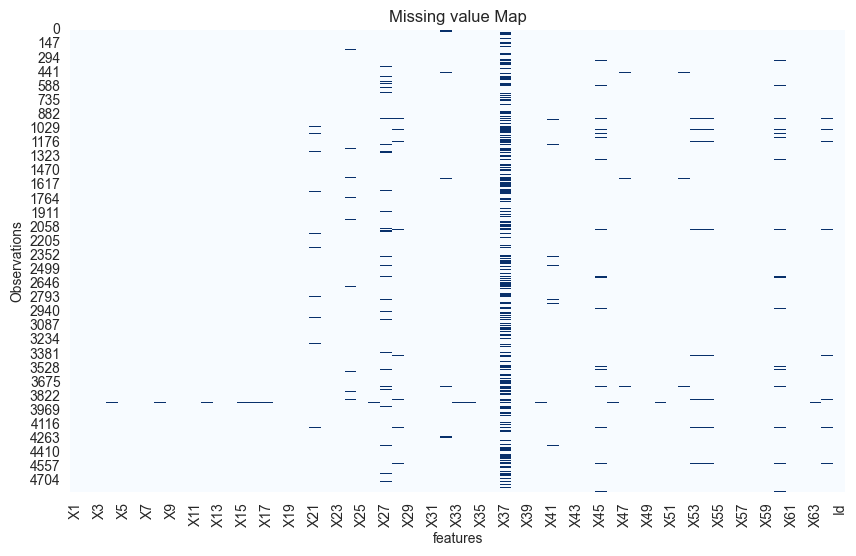

In [9]:
missing_values = X.isnull()

plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap="Blues", cbar=False)

plt.title("Missing value Map")
plt.xlabel("features")
plt.ylabel("Observations")

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show();

Form the figure, we can figure out X37: (current assets - inventories) / long-term liabilities has many missing values. We will handle the missing values in the following preprocessing data.

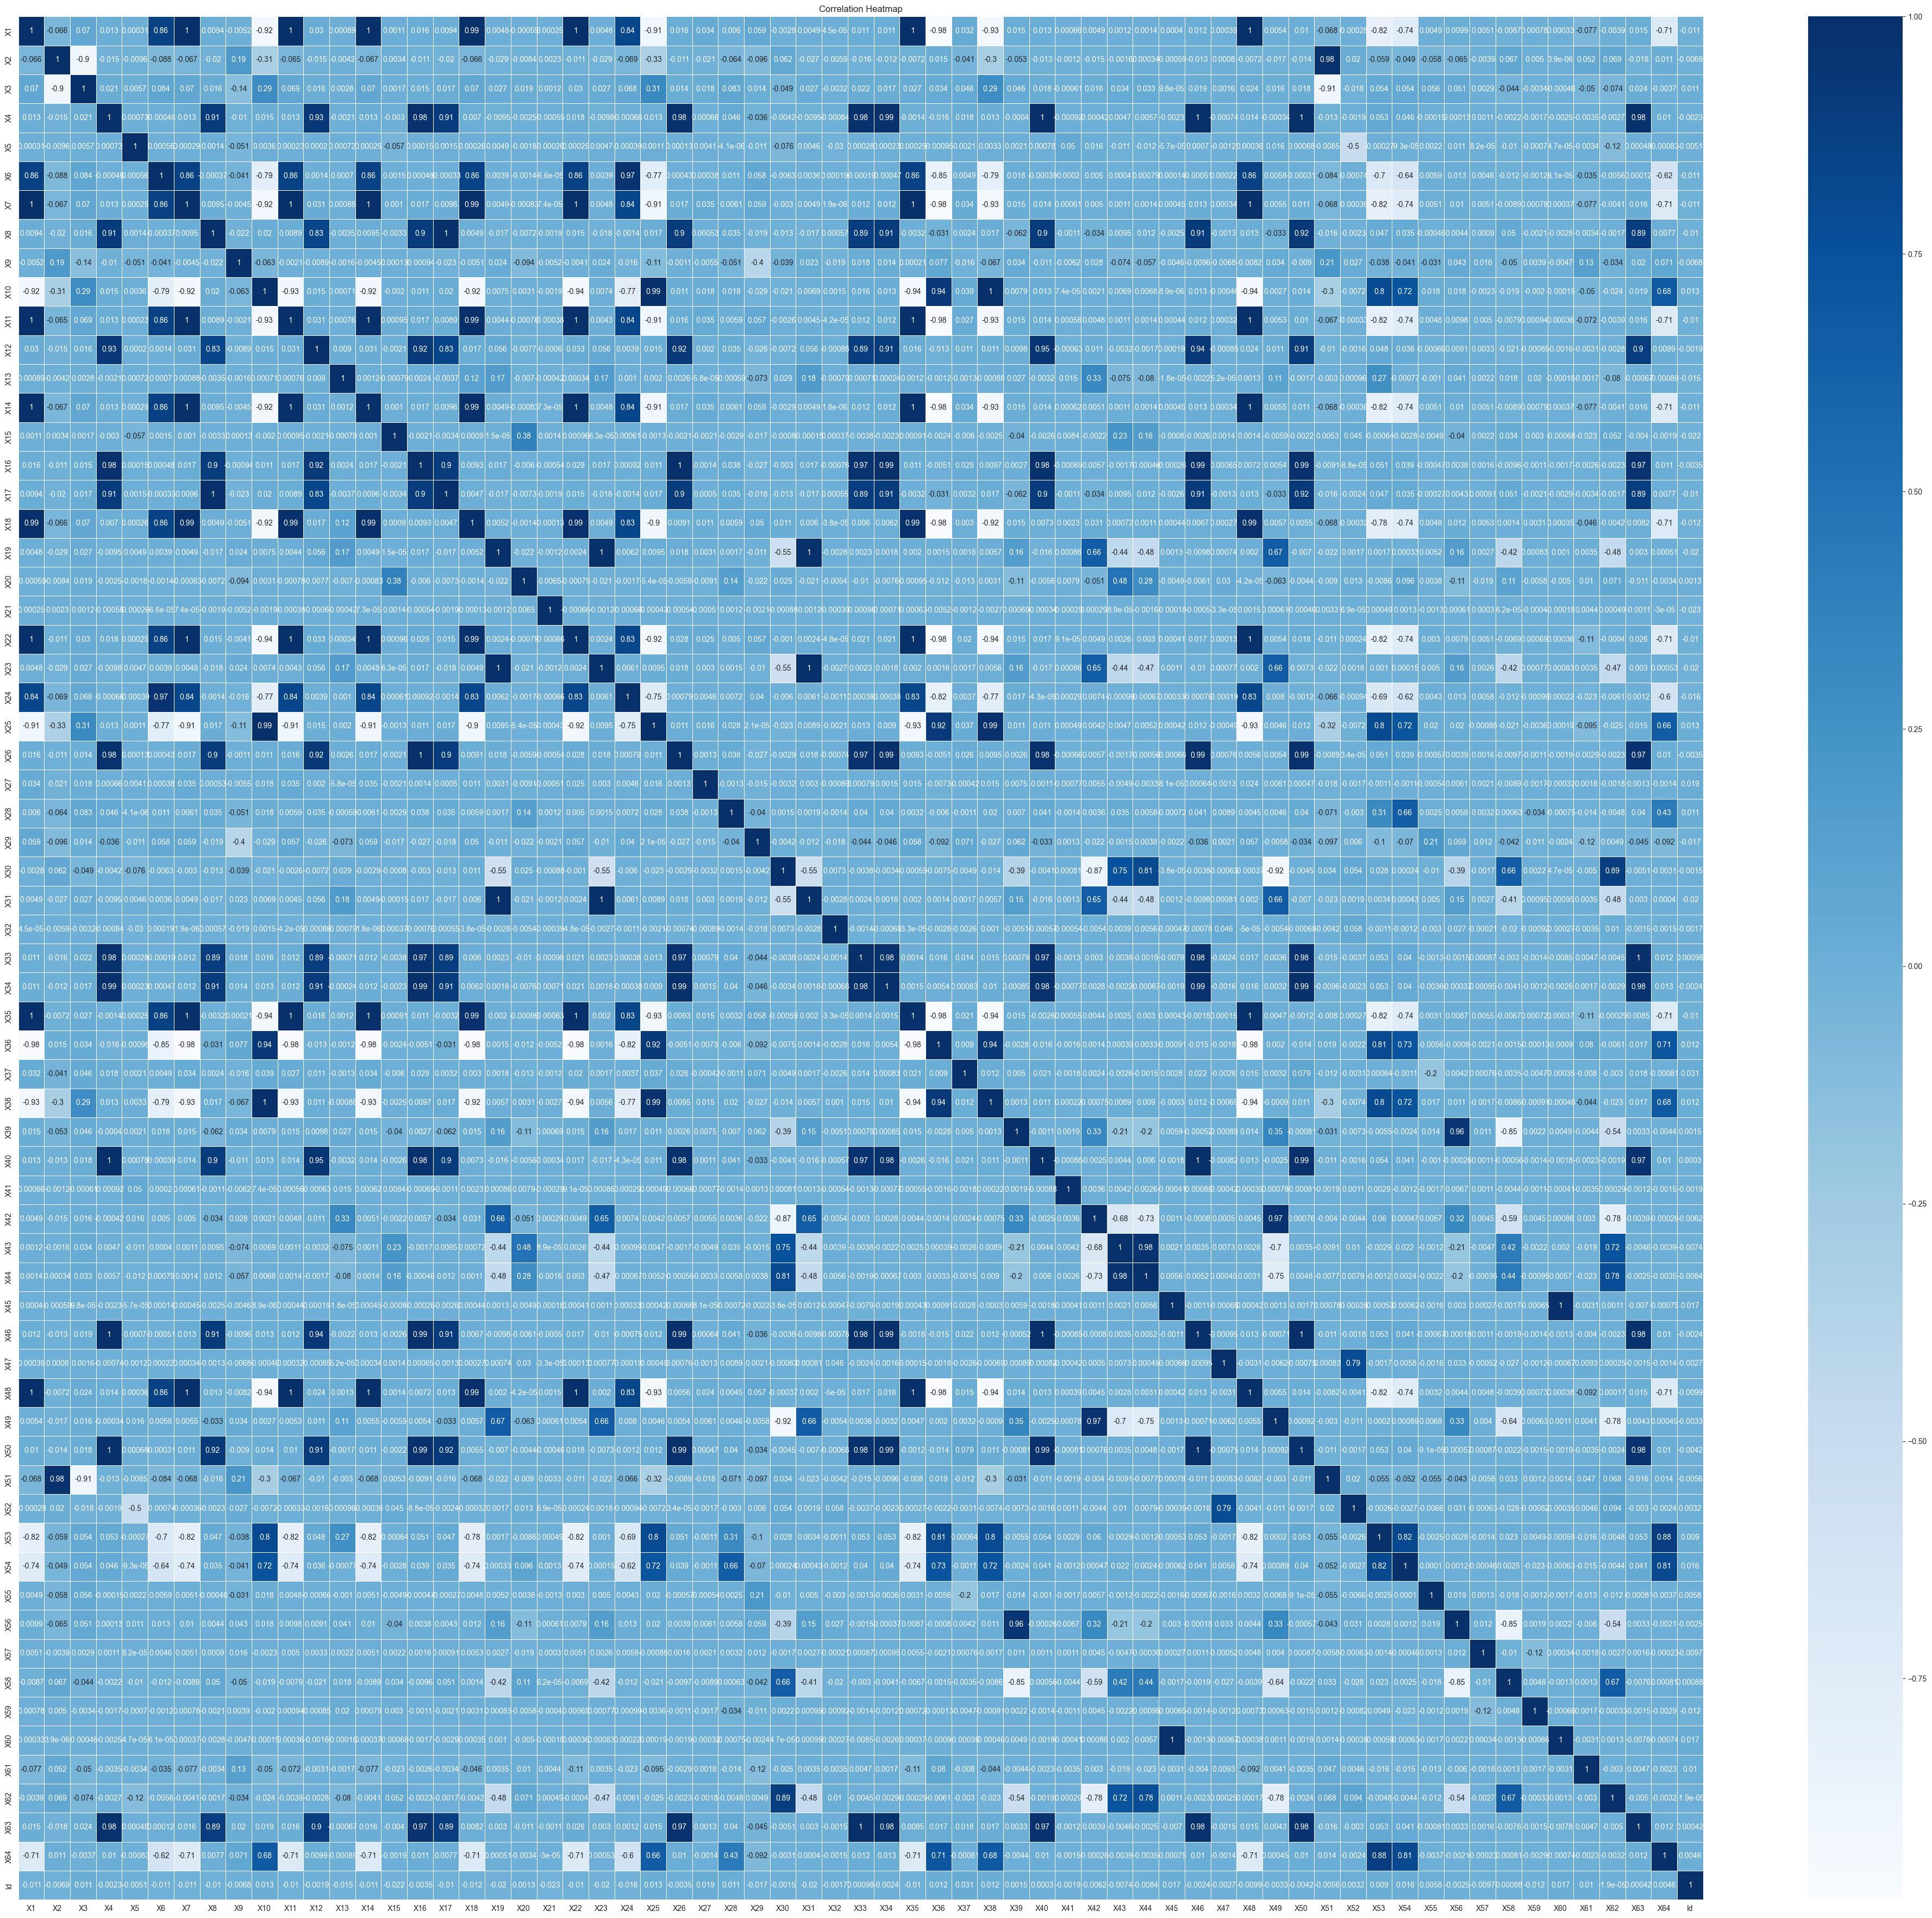

In [10]:
corr_matrix = X.corr()
plt.figure(figsize=(50, 45))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show();

From the figure, we can see that some features are highly correlated. Therefore, we will drop some features in the following preprocessing data.

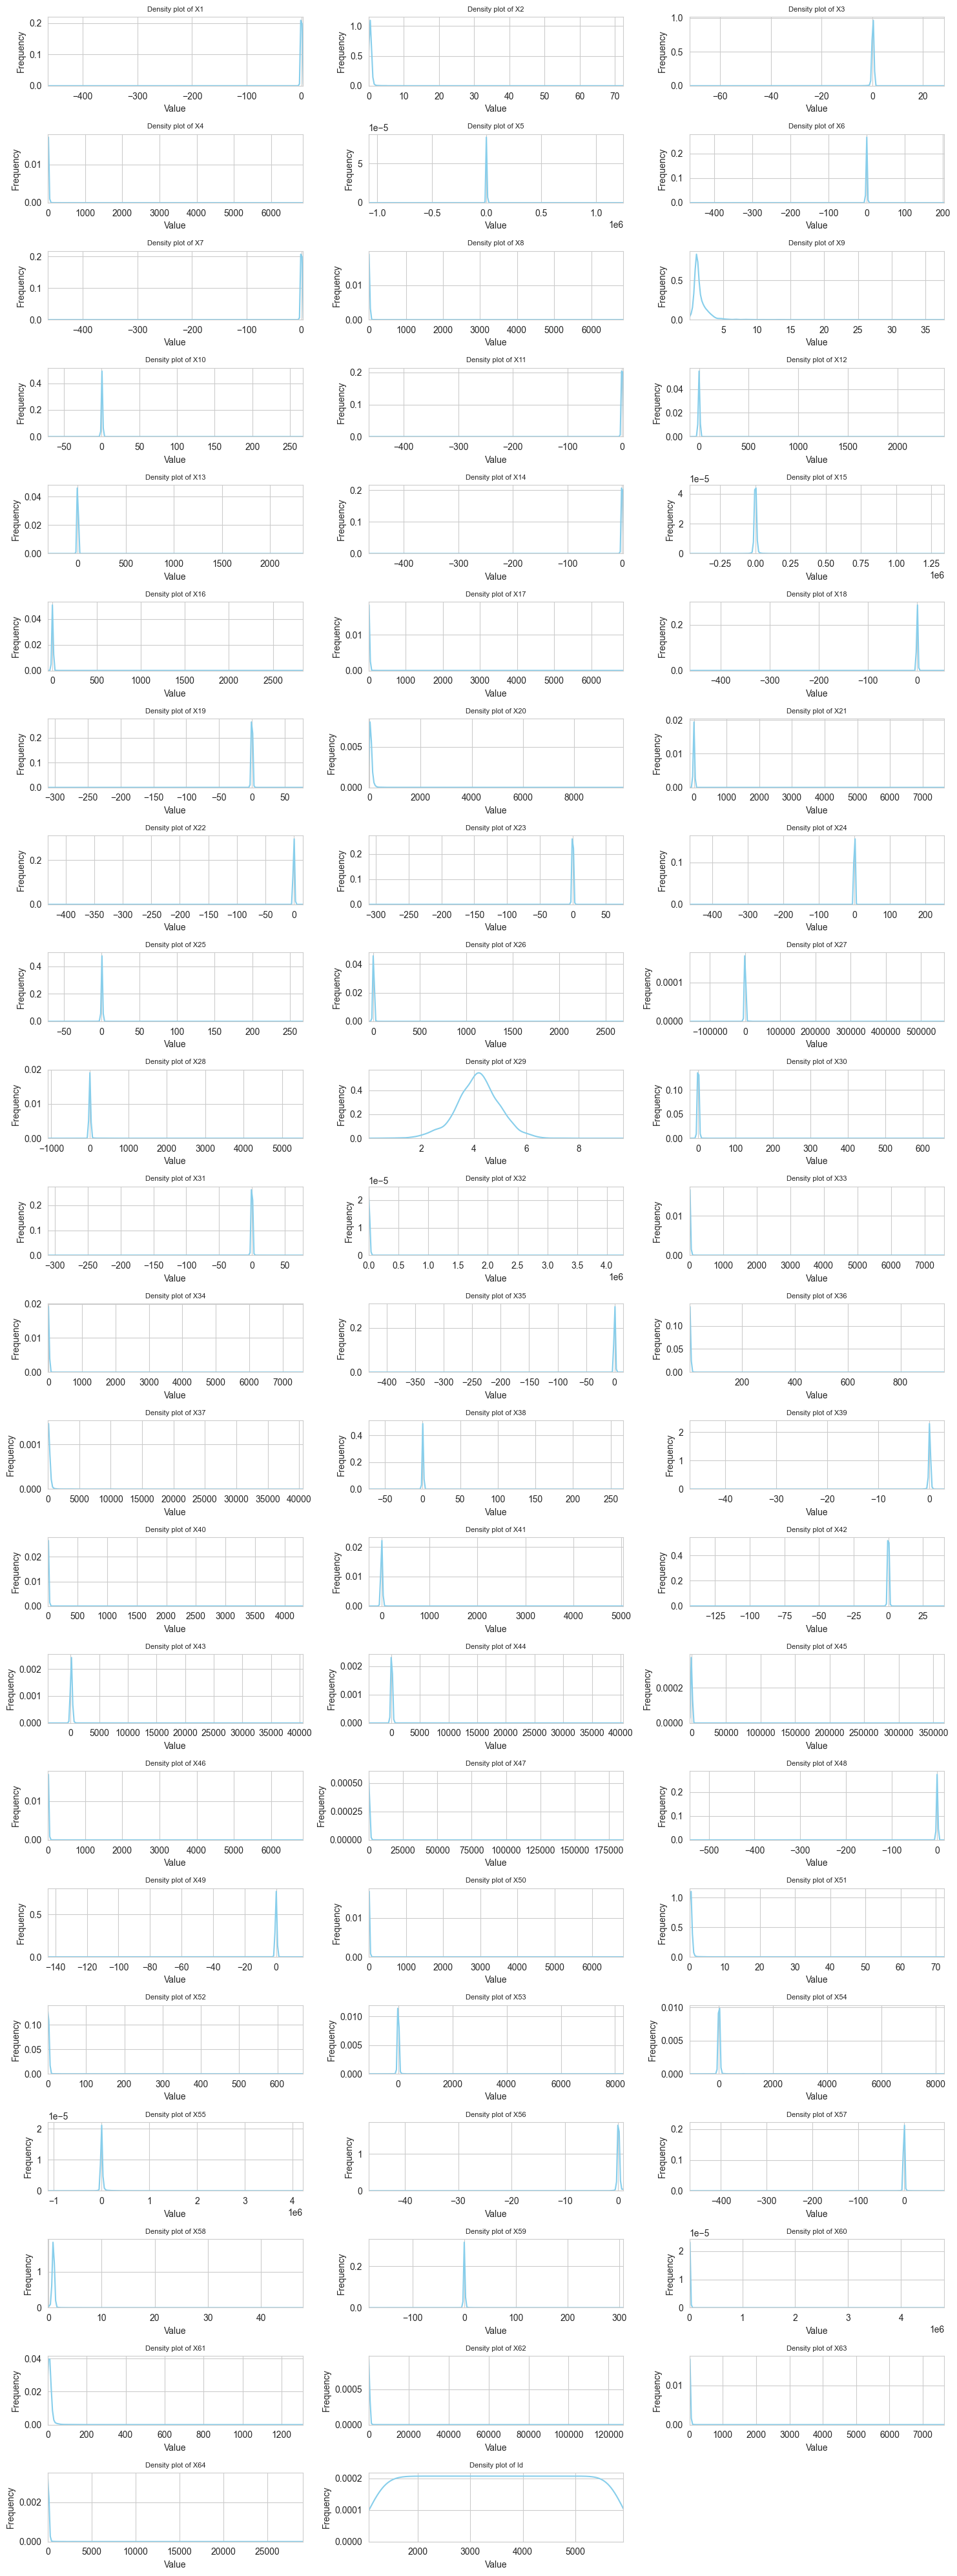

In [11]:
plt.figure(figsize=(15, 40))
i = 1
for column in X.columns:
    plt.subplot(22, 3, i)
    sns.kdeplot(X[column], color="skyblue")
    plt.title(f"Density plot of {column}", fontsize=8)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.xlim(X[column].min(), X[column].max())
    
    i += 1

plt.tight_layout()
plt.show();

The features do not follow a normal distribution. Therefore, in the following preprocessing data, we will use the MinMaxScaler to scale the data.

In [12]:
y.value_counts()

Bankrupt
0    4510
1     308
Name: count, dtype: int64

The taregt is imbalanced. We will use the SMOTE method to handle the imbalanced data in the following preprocessing data.


### Chapter 2: Data Preprocessing
In this Chapter, we creat steps for preprocessing the data. To prevent the data leakage, we use a pipeline for preprocessing in next chapter. Here, we only outline and define the data preprocessing steps and methods.

#### 2.1 Missing Values Handling
In this step, we handle the missing values in the dataset. We have two methods to handle missing values:
Remove Missing Values: If the missing values > 30% of total data points, drop those columns.
Impute Missing Values: Use knn methods to fill in missing data. In the following, the line knn_imputer = KNNImputer(n_neighbors=5) creates an imputer that fills in missing values using the K-nearest neighbors algorithm with 5 neighbors for each missing data point.

In [13]:
#Remove Missing Values
def drop_high_missing_columns(X, missing_threshold=0.3):
    X_dropped = pd.DataFrame(X).dropna(thresh=int((1 - missing_threshold) * X.shape[0]), axis=1)
    return X_dropped

#Impute Missing Values
knn_imputer=KNNImputer(n_neighbors=5)

#### 2.2 Data Scaling
In this step, we use MinMaxScaler to scale the data since the data does not follow a normal distribution.

In [14]:
scaler = MinMaxScaler()

#### 2.3 Feature Selection
Since the dimensions of the data is very high, we need to reduce the number of features to improve the model's performance.
First, we use the SelectKBest method to select the top 30 features that have the highest ANOVA F-values.
Secondly, we use the CorrelationAndANOVAFeatureSelector to remove the features that have high correlation (>0.95) with other features and low ANOVA F-values.
Then, we use PCA to reduce the number of features while retaining 95% of the variance.

In [15]:
anova = SelectKBest(score_func=f_classif, k=30)

class CorrelationAndANOVAFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, corr_threshold=0.95):
        self.corr_threshold = corr_threshold
        self.features_to_keep = None

    def fit(self, X, y):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)

        corr_matrix = X.corr().abs()

        high_corr_pairs = set()
        for i in range(len(corr_matrix.columns)):
            for j in range(i):
                if corr_matrix.iloc[i, j] > self.corr_threshold:
                    colname_i = corr_matrix.columns[i]
                    colname_j = corr_matrix.columns[j]
                    high_corr_pairs.add((colname_i, colname_j))

        F_values, _ = f_classif(X, y)
        anova_results = pd.Series(F_values, index=X.columns)

        features_to_drop = set()
        for col1, col2 in high_corr_pairs:
            if anova_results[col1] > anova_results[col2]:
                features_to_drop.add(col2)
            else:
                features_to_drop.add(col1)

        self.features_to_keep = [col for col in X.columns if col not in features_to_drop]
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray):
            X = pd.DataFrame(X)
        return X[self.features_to_keep]

pca = PCA(n_components=0.95,random_state=42)

#### 2.4 Oversampling
In this step, we use the SMOTE method to handle the imbalanced data.

In [16]:
smote = SMOTE(random_state=42)

### Chapter 3: Model testing and selection
In this chapter, we test different models using cross-validation and evaluate the models using a custom scoring function, accuracy, recall, precision. 

#### 3.1 Loss Function and Cross-Validation
Since the it is 5 times worse to fail to identify a company that will go bankrupt than it is to fail to identify a company that won't go bankrupt. We use a different loss function--The custom scoring function, to solve the problem. The custom scoring function calculates the cost of misclassification based on the number of false positives and false negatives. The cost of a false negative is set to 5 times the cost of a false positive.

In [17]:
def custom_scorer(y_true, y_pred):

    recall = recall_score(y_true, y_pred, pos_label=1)  
    precision = precision_score(y_true, y_pred, pos_label=1)
    
    false_negative_cost = 5
    false_negatives = ((y_true == 1) & (y_pred == 0)).sum() 
    false_positives = ((y_true == 0) & (y_pred == 1)).sum()  
    

    cost = (false_negative_cost * false_negatives) + false_positives

    return cost

Cross-Validation: We use 5-fold cross-validation to evaluate the model's performance.

In [18]:
scorer = make_scorer(custom_scorer, greater_is_better=False)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### 3.2 Logistic Regression
 We use logistic regression to evaluate the model's performance. We use the pipeline to preprocess the data and build the model. We use GridSearchCV to find the best hyperparameters for the model.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('drop_high_missing',
                                        FunctionTransformer(func=<function drop_high_missing_columns at 0x1464ea820>)),
                                       ('knn_imputer', KNNImputer()),
                                       ('scaler', MinMaxScaler()),
                                       ('anova', SelectKBest(k=30)),
                                       ('feature_selection',
                                        CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
                                       ('pca',
                                        PCA(n_components=0.95,
                                            random_state=42)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none']},
             scoring=make_scorer(custom_scorer, greater_is_better=False, response_method='predict'))

Best Logistic Regression Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2'}
Training Data:
Logistic Regression Accuracy: 0.759
Logistic Regression Recall: 0.668
Logistic Regression Precision: 0.158
Confusion Matrix:


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

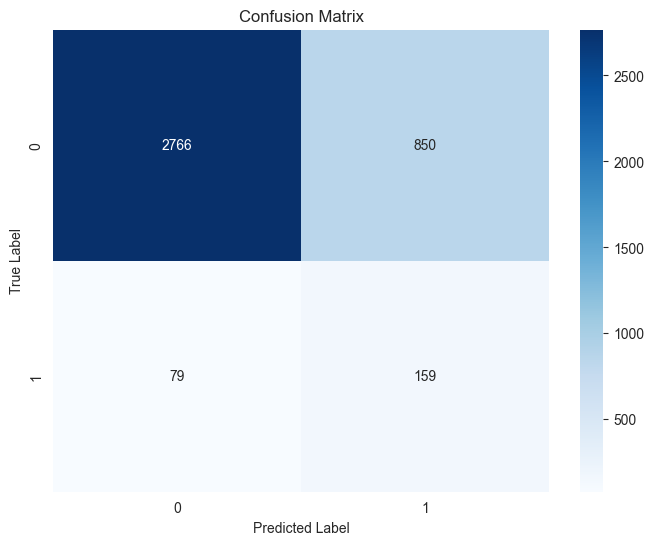

Testing Data:
Logistic Regression Accuracy: 0.756
Logistic Regression Recall: 0.686
Logistic Regression Precision: 0.184
Confusion Matrix:


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

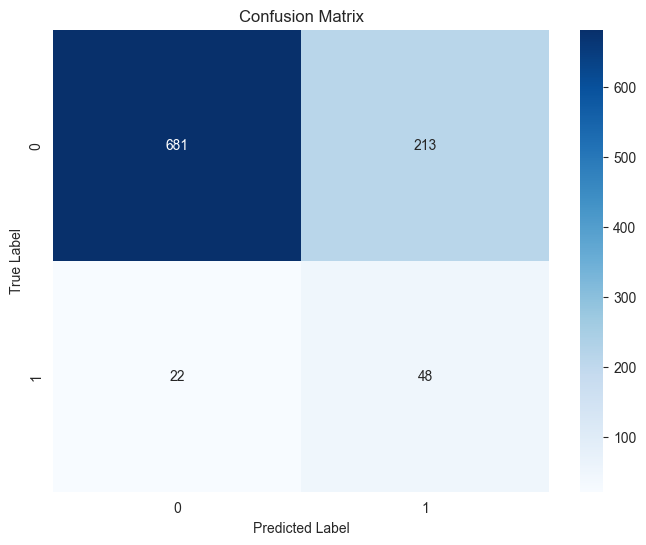

In [19]:

pipeline_lr = Pipeline([
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),  
    ('scaler', scaler),  
    ('anova', anova),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)), 
    ('pca', pca), 
    ('smote', smote),
    ('classifier', LogisticRegression(random_state=42)) 
])

param_grid_lr = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'classifier__C': [0.01, 0.1, 1, 10]
}


grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=cv, scoring=scorer, n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

print(f"Best Logistic Regression Parameters: {grid_search_lr.best_params_}")

best_lr_model = grid_search_lr.best_estimator_
y_pred_train_lr = best_lr_model.predict(X_train)
y_pred_test_lr = best_lr_model.predict(X_test)

accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
recall_train_lr = recall_score(y_train, y_pred_train_lr, pos_label=1,zero_division=0,average="binary")
precision_train_lr = precision_score(y_train, y_pred_train_lr, pos_label=1, zero_division=0,average="binary")
cm_train_lr = confusion_matrix(y_train, y_pred_train_lr)

accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
recall_test_lr = recall_score(y_test, y_pred_test_lr, pos_label=1,zero_division=0,average="binary")
precision_test_lr = precision_score(y_test, y_pred_test_lr, pos_label=1, zero_division=0,average="binary")
cm_test_lr = confusion_matrix(y_test, y_pred_test_lr)

print(f"Training Data:")
print(f"Logistic Regression Accuracy: {accuracy_train_lr:.3f}")
print(f"Logistic Regression Recall: {recall_train_lr:.3f}")
print(f"Logistic Regression Precision: {precision_train_lr:.3f}")
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_lr, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"Logistic Regression Accuracy: {accuracy_test_lr:.3f}")
print(f"Logistic Regression Recall: {recall_test_lr:.3f}")
print(f"Logistic Regression Precision: {precision_test_lr:.3f}")
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_lr, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


The logistic regression model achieved a training accuracy of 0.759 and a testing accuracy of 0.756, indicating good generalization. The recall values were 0.668 for training and 0.686 for testing, showing that the model is effective at capturing positive instances. However, the precision was quite low, with 0.158 for training and 0.184 for testing, suggesting a high false positive rate.

#### 3.3 SVM
We use SVM to evaluate the model's performance. We use the pipeline to preprocess the data and build the model. We use GridSearchCV to find the best hyperparameters for the model.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('drop_high_missing',
                                        FunctionTransformer(func=<function drop_high_missing_columns at 0x1464ea820>)),
                                       ('knn_imputer', KNNImputer()),
                                       ('scaler', MinMaxScaler()),
                                       ('anova', SelectKBest(k=30)),
                                       ('feature_selection',
                                        CorrelationAndANOVAFeatureSelector(corr_threshold=...,
                                       ('pca',
                                        PCA(n_components=0.95,
                                            random_state=42)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier', SVC(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'classifier__gamma': ['scale', 'auto'],
                         'classifier__kernel': ['linear', 'poly', 'rbf',
                                                'sigmoid']},
             scoring=make_scorer(custom_scorer, greater_is_better=False, response_method='predict'))

Best SVM Parameters: {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'poly'}
Training Data:
SVM Accuracy: 0.916
SVM Recall: 0.298
SVM Precision: 0.313


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

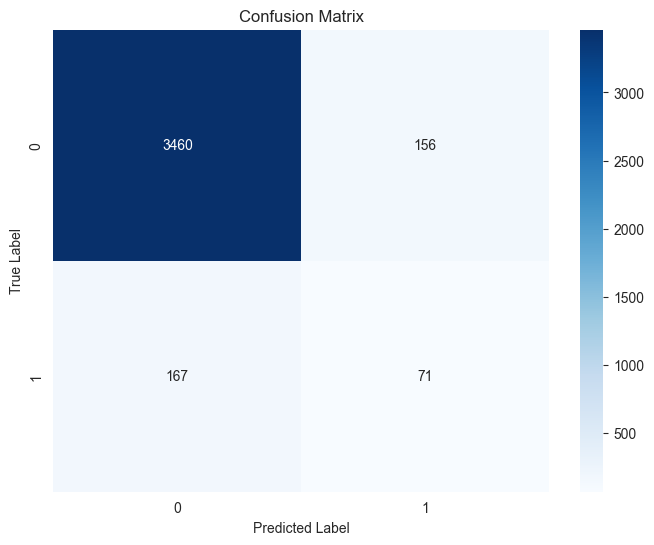

Testing Data:
SVM Accuracy: 0.904
SVM Recall: 0.286
SVM Precision: 0.317


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

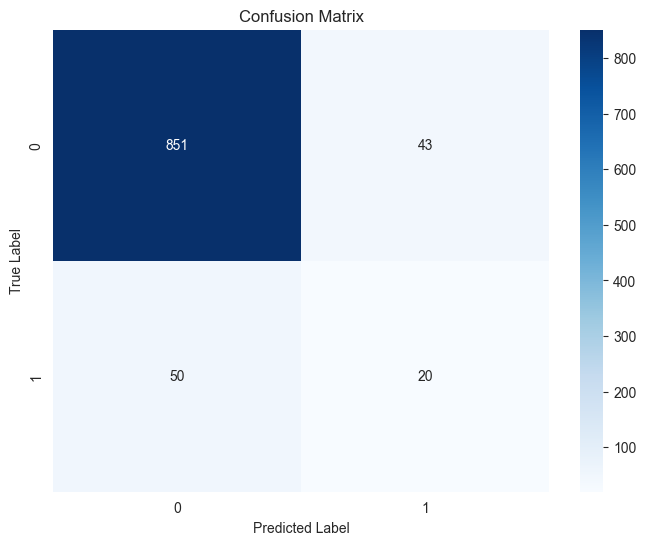

In [20]:

scorer = make_scorer(custom_scorer, greater_is_better=False)

pipeline_svm = Pipeline([
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),
    ('scaler', scaler),
    ('anova', anova),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
    ('pca', pca),
    ('smote', smote),
    ('classifier', SVC(random_state=42)) 
])

param_grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],  
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  
    'classifier__gamma': ['scale', 'auto']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=cv, scoring=scorer, n_jobs=-1)
grid_search_svm.fit(X_train, y_train)
print(f"Best SVM Parameters: {grid_search_svm.best_params_}")

best_svm_model = grid_search_svm.best_estimator_
y_pred_train_svm = best_svm_model.predict(X_train)
y_pred_test_svm = best_svm_model.predict(X_test)

accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
recall_train_svm = recall_score(y_train, y_pred_train_svm, pos_label=1,zero_division=0,average="binary")
precision_train_svm = precision_score(y_train, y_pred_train_svm, pos_label=1, zero_division=0,average="binary")
cm_train_svm = confusion_matrix(y_train, y_pred_train_svm)

accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)
recall_test_svm = recall_score(y_test, y_pred_test_svm, pos_label=1,zero_division=0,average="binary")
precision_test_svm = precision_score(y_test, y_pred_test_svm, pos_label=1, zero_division=0,average="binary")
cm_test_svm = confusion_matrix(y_test, y_pred_test_svm)

print(f"Training Data:")
print(f"SVM Accuracy: {accuracy_train_svm:.3f}")
print(f"SVM Recall: {recall_train_svm:.3f}")
print(f"SVM Precision: {precision_train_svm:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_svm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"SVM Accuracy: {accuracy_test_svm:.3f}")
print(f"SVM Recall: {recall_test_svm:.3f}")
print(f"SVM Precision: {precision_test_svm:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_svm, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The SVM model, using a polynomial kernel, achieved a training accuracy of 0.916 and a testing accuracy of 0.904, suggesting that the model generalizes well and has learned the training data effectively.  However, both recall and precision values are relatively low: the recall is 0.298 for training and 0.286 for testing, while the precision is 0.313 for training and 0.317 for testing.  This indicates that the model struggles to identify positive instances, leading to a high rate of false negatives and a moderate rate of false positives.
while the accuracy is high, the recall suggests that the model fails to capture a significant portion of true positives.  This could mean that the SVM is not adequately handling class imbalance or complexity in the data.  

#### 3.4 KNeighborsClassifier
We use KNeighborsClassifier to evaluate the model's performance. We use the pipeline to preprocess the data and build the model. We use GridSearchCV to find the best hyperparameters for the model.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('drop_high_missing',
                                        FunctionTransformer(func=<function drop_high_missing_columns at 0x1464ea820>)),
                                       ('knn_imputer', KNNImputer()),
                                       ('scaler', MinMaxScaler()),
                                       ('anova', SelectKBest(k=30)),
                                       ('feature_selection',
                                        CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
                                       ('pca',
                                        PCA(n_components=0.95,
                                            random_state=42)),
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'classifier__n_neighbors': [3, 5, 7, 9]},
             scoring=make_scorer(custom_scorer, greater_is_better=False, response_method='predict'))

Best KNeighborsClassifier Parameters: {'classifier__n_neighbors': 3}
Training Data:
KNeighborsClassifier Accuracy: 0.904
KNeighborsClassifier Recall: 1.000
KNeighborsClassifier Precision: 0.392


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

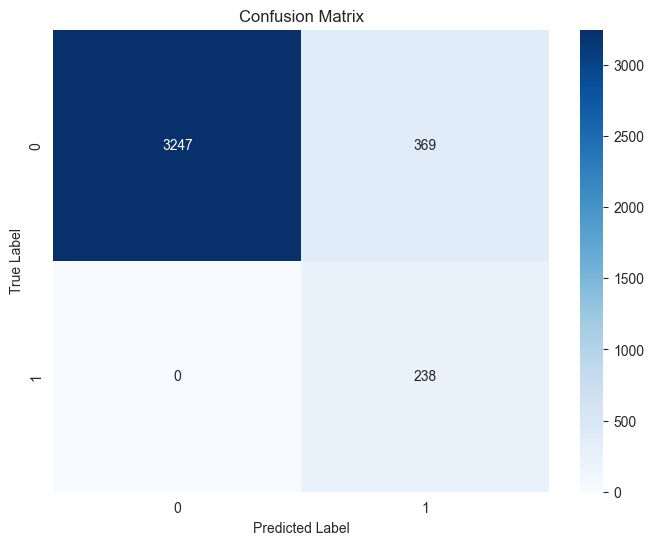

Testing Data:
KNeighborsClassifier Accuracy: 0.803
KNeighborsClassifier Recall: 0.400
KNeighborsClassifier Precision: 0.159


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

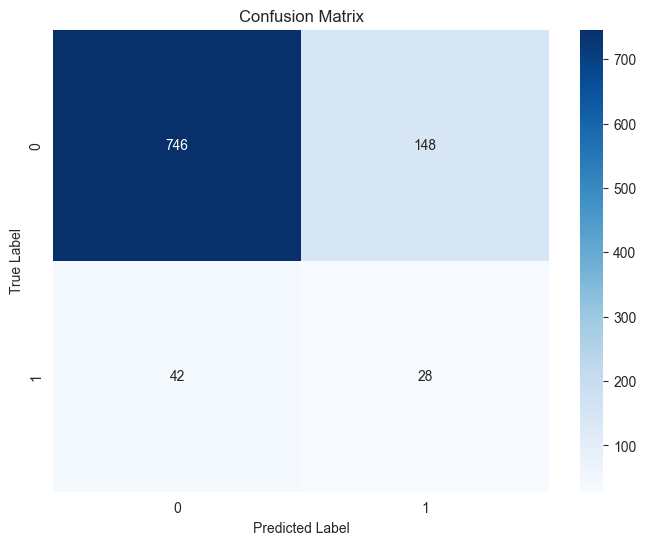

In [21]:

scorer = make_scorer(custom_scorer, greater_is_better=False)


pipeline_knn = Pipeline([
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),  
    ('scaler', scaler),  
    ('anova', anova),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
    ('pca', pca),  
    ('smote', smote),
    ('classifier', KNeighborsClassifier())  
])

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=cv, scoring=scorer, n_jobs=-1)

grid_search_knn.fit(X_train, y_train)

print(f"Best KNeighborsClassifier Parameters: {grid_search_knn.best_params_}")

best_knn_model = grid_search_knn.best_estimator_
y_pred_train_knn = best_knn_model.predict(X_train)
y_pred_test_knn = best_knn_model.predict(X_test)

accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
recall_train_knn = recall_score(y_train, y_pred_train_knn, pos_label=1,zero_division=0,average="binary")
precision_train_knn = precision_score(y_train, y_pred_train_knn, pos_label=1, zero_division=0,average="binary")
cm_train_knn = confusion_matrix(y_train, y_pred_train_knn)

accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
recall_test_knn = recall_score(y_test, y_pred_test_knn, pos_label=1,zero_division=0,average="binary")
precision_test_knn = precision_score(y_test, y_pred_test_knn, pos_label=1, zero_division=0,average="binary")
cm_test_knn = confusion_matrix(y_test, y_pred_test_knn)

print(f"Training Data:")
print(f"KNeighborsClassifier Accuracy: {accuracy_train_knn:.3f}")
print(f"KNeighborsClassifier Recall: {recall_train_knn:.3f}")
print(f"KNeighborsClassifier Precision: {precision_train_knn:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_knn, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"KNeighborsClassifier Accuracy: {accuracy_test_knn:.3f}")
print(f"KNeighborsClassifier Recall: {recall_test_knn:.3f}")
print(f"KNeighborsClassifier Precision: {precision_test_knn:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_knn, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The K-Nearest Neighbors (KNN) classifier achieved a training accuracy of 0.904 and a testing accuracy of 0.803.  While the training recall is 1.000, indicating that the model identifies all positive instances in the training data, the precision is relatively low at 0.392.  This suggests that although the model captures all positive instances, many of them are incorrectly classified as positive (false positives). On the testing data, the recall drops significantly to 0.400, and the precision drops further to 0.159.  This indicates that the model struggles to generalize and detect positive instances correctly in the unseen data.

#### 3.5 RandomForestClassifier
 We use RandomForestClassifier to evaluate the model's performance. We use the pipeline to preprocess the data and build the model. We use GridSearchCV to find the best hyperparameters for the model.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('drop_high_missing',
                                        FunctionTransformer(func=<function drop_high_missing_columns at 0x1464ea820>)),
                                       ('knn_imputer', KNNImputer()),
                                       ('scaler', MinMaxScaler()),
                                       ('anova', SelectKBest(k=30)),
                                       ('feature_selection',
                                        CorrelationAndANOVAFeatureSelector(corr_threshold=...
                                       ('smote', SMOTE(random_state=42)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [5, 7, 10],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [50, 100, 150]},
             scoring=make_scorer(custom_scorer, greater_is_better=False, response_method='predict'))

Best RandomForestClassifie Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Training Data:
RandomForestClassifier Accuracy: 0.936
RandomForestClassifier Recall: 0.950
RandomForestClassifier Precision: 0.490


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

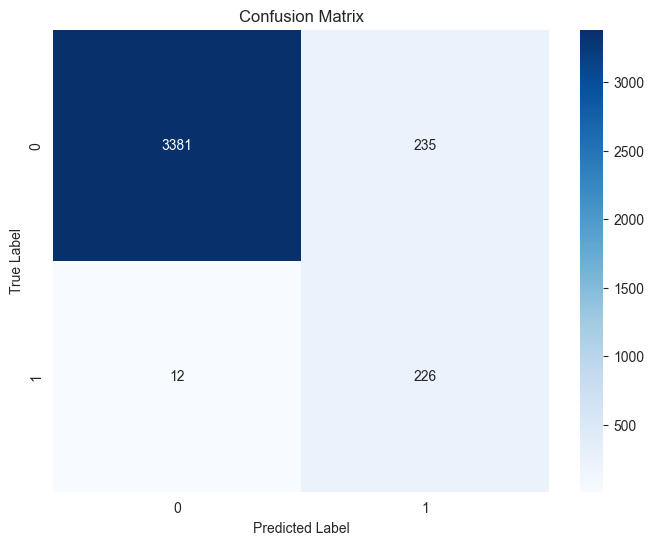

Testing Data:
RandomForestClassifier Accuracy: 0.853
RandomForestClassifier Recall: 0.514
RandomForestClassifier Precision: 0.250


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

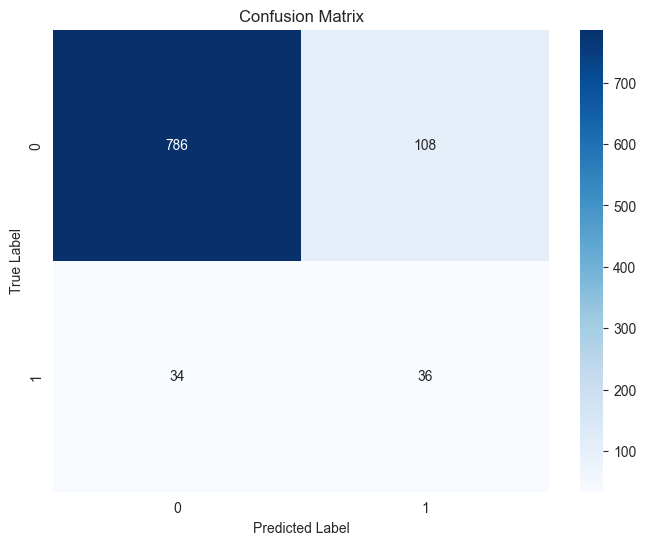

In [22]:

pipeline_rf = Pipeline([
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),
    ('scaler', scaler),
    ('anova', anova),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
    ('pca', pca),
    ('smote', smote),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [5,7,10],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=cv, scoring=scorer, n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print(f"Best RandomForestClassifie Parameters: {grid_search_rf.best_params_}")

best_rf_model = grid_search_rf.best_estimator_
y_pred_train_rf = best_rf_model.predict(X_train)
y_pred_test_rf = best_rf_model.predict(X_test)

accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
recall_train_rf = recall_score(y_train, y_pred_train_rf, pos_label=1,zero_division=0,average="binary")
precision_train_rf = precision_score(y_train, y_pred_train_rf, pos_label=1, zero_division=0,average="binary")
cm_train_rf = confusion_matrix(y_train, y_pred_train_rf)

accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf, pos_label=1,zero_division=0,average="binary")
precision_test_rf = precision_score(y_test, y_pred_test_rf, pos_label=1, zero_division=0,average="binary")
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)

print(f"Training Data:")
print(f"RandomForestClassifier Accuracy: {accuracy_train_rf:.3f}")
print(f"RandomForestClassifier Recall: {recall_train_rf:.3f}")
print(f"RandomForestClassifier Precision: {precision_train_rf:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_rf, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"RandomForestClassifier Accuracy: {accuracy_test_rf:.3f}")
print(f"RandomForestClassifier Recall: {recall_test_rf:.3f}")
print(f"RandomForestClassifier Precision: {precision_test_rf:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rf, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The Random Forest model achieved a training accuracy of 0.936 and a testing accuracy of 0.853, indicating reasonable generalization. The training recall is very high at 0.950, showing that the model is effectively identifying positive instances in the training set, while precision is moderate at 0.490, suggesting a notable rate of false positives. For the testing data, the recall drops to 0.514, and the precision further drops to 0.250. The decrease in recall and precision on the test set suggests that while the model is relatively good at capturing positive instances in the training data, it struggles more with generalizing to unseen data, with a significant number of false positives and false negatives.

#### 3.6 XGBoost: 
We use XGBoost to evaluate the model's performance. We use the pipeline to preprocess the data and build the model. We use GridSearchCV to find the best hyperparameters for the model.

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('drop_high_missing',
                                        FunctionTransformer(func=<function drop_high_missing_columns at 0x1464ea820>)),
                                       ('knn_imputer', KNNImputer()),
                                       ('scaler', MinMaxScaler()),
                                       ('anova', SelectKBest(k=30)),
                                       ('feature_selection',
                                        CorrelationAndANOVAFeatureSelector(corr_threshold=...
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'classifier__colsample_bytree': [0.2, 0.3],
                         'classifier__learning_rate': [0.004, 0.006],
                         'classifier__max_depth': [9, 11],
                         'classifier__min_child_weight': [2, 3],
                         'classifier__n_estimators': [100, 150]},
             scoring=make_scorer(custom_scorer, greater_is_better=False, response_method='predict'))

Best Xgboost Parameters: {'classifier__colsample_bytree': 0.3, 'classifier__learning_rate': 0.006, 'classifier__max_depth': 11, 'classifier__min_child_weight': 3, 'classifier__n_estimators': 150}
Training Data:
Xgboost Accuracy: 0.941
Xgboost Recall: 0.954
Xgboost Precision: 0.511


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

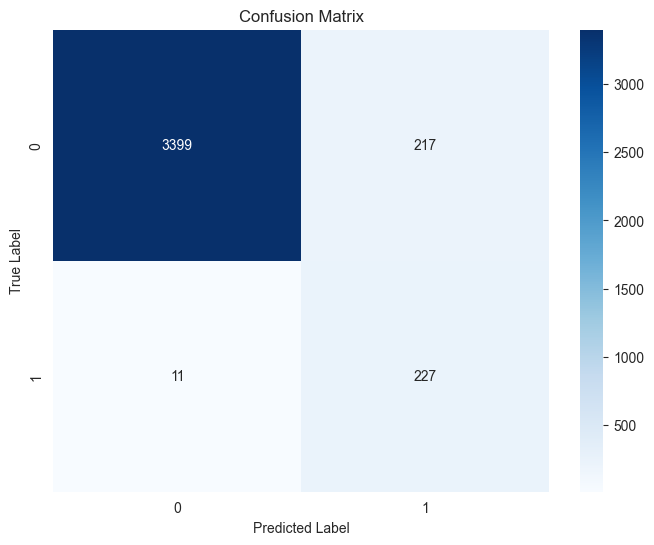

Testing Data:
Xgboost Accuracy: 0.851
Xgboost Recall: 0.586
Xgboost Precision: 0.263


<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 36.72222222222221, 'Predicted Label')

Text(70.72222222222221, 0.5, 'True Label')

Text(0.5, 1.0, 'Confusion Matrix')

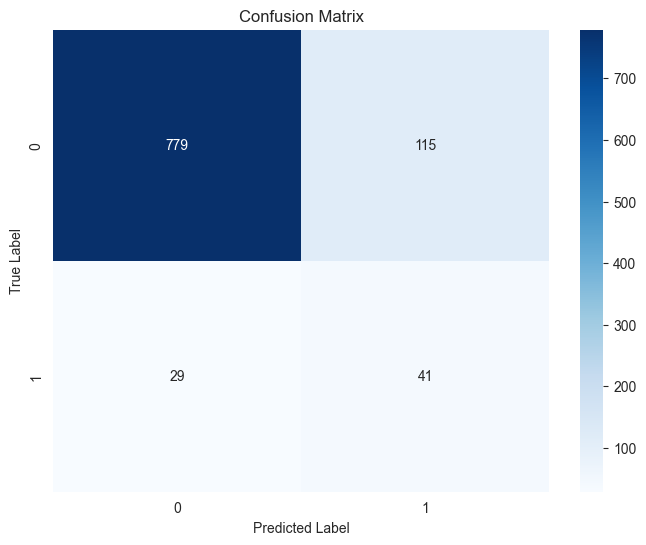

In [23]:
scorer = make_scorer(custom_scorer, greater_is_better=False)
xgb_model = xgb.XGBClassifier(random_state=42)
pipeline_xgb = Pipeline([
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),
    ('scaler', scaler),
    ('anova', anova),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
    ('pca', pca),
    ('smote', smote),
    ('classifier', xgb_model) 
])

param_grid_xgb = {
    'classifier__n_estimators': [100, 150],
    'classifier__max_depth': [ 9,11], 
    'classifier__learning_rate': [0.004,0.006],
    'classifier__min_child_weight': [ 2,3],
    'classifier__colsample_bytree': [0.2,0.3],
    
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=cv, scoring=scorer, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print(f"Best Xgboost Parameters: {grid_search_xgb.best_params_}")

best_xgb_model = grid_search_xgb.best_estimator_
y_pred_train_xgb = best_xgb_model.predict(X_train)
y_pred_test_xgb = best_xgb_model.predict(X_test)

accuracy_train_xgb = accuracy_score(y_train, y_pred_train_xgb)
recall_train_xgb = recall_score(y_train, y_pred_train_xgb, pos_label=1,zero_division=0,average="binary")
precision_train_xgb = precision_score(y_train, y_pred_train_xgb, pos_label=1, zero_division=0,average="binary")
cm_train_xgb = confusion_matrix(y_train, y_pred_train_xgb)

accuracy_test_xgb = accuracy_score(y_test, y_pred_test_xgb)
recall_test_xgb = recall_score(y_test, y_pred_test_xgb, pos_label=1,zero_division=0,average="binary")
precision_test_xgb = precision_score(y_test, y_pred_test_xgb, pos_label=1, zero_division=0,average="binary")
cm_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)

print(f"Training Data:")
print(f"Xgboost Accuracy: {accuracy_train_xgb:.3f}")
print(f"Xgboost Recall: {recall_train_xgb:.3f}")
print(f"Xgboost Precision: {precision_train_xgb:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_xgb, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"Xgboost Accuracy: {accuracy_test_xgb:.3f}")
print(f"Xgboost Recall: {recall_test_xgb:.3f}")
print(f"Xgboost Precision: {precision_test_xgb:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_xgb, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


The XGBoost model has shown impressive results, achieving a training accuracy of 0.941 and a testing accuracy of 0.851.  This model strikes a promising balance between capturing the underlying patterns in the data and generalizing well to new data.  Compared to the Random Forest model, which had a testing accuracy of 0.853, the XGBoost performs similarly, but with some improvements in certain metrics, such as training recall (0.954) and a slightly higher precision (0.511) during training. XGBoost's testing recall of 0.586 is a notable improvement over the Random Forest's recall of 0.514, showing that XGBoost is able to identify a larger portion of the positive instances in the test data.  Its testing precision of 0.263 is also a bit higher than Random Forest's 0.250, suggesting fewer false positives overall. Compared to the KNN and SVM models, XGBoost significantly outperforms in both recall and accuracy.  KNN had difficulty with overfitting, while the SVM model struggled with both recall and precision.  XGBoost, on the other hand, provides a strong overall performance with a high recall, meaning it captures more of the positive instances while avoiding overfitting. The XGBoost model's performance benefits from its ability to handle complex patterns, which is evident when comparing its metrics to the other models.  With some further tuning, XGBoost could potentially further outperform the other models, making it an excellent choice for this classification task.

Among all the models, XGBoost demonstrates the best performance. However, the overall results are still not entirely satisfactory. In the next chapter, we will focus on making targeted enhancements to further improve the XGBoost model's performance.

### Chapter 4: Model tuning
In this chapter, we will focus on enhancing the XGBoost model by drawing inspiration from a research paper titled "Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction" (Zieba et al., 2016). By leveraging insights from this study, we will apply targeted optimization techniques to further improve our model's performance.


#### 4.1 Method Description

The paper presents a novel approach for bankruptcy prediction using Extreme Gradient Boosting (XGB) combined with synthetic feature generation.  Specifically, the authors use XGB to train an ensemble of decision trees, and generate new synthetic features by performing arithmetic operations (addition, subtraction, multiplication, division) on existing economic indicators to capture higher-order statistical relationships in the data.

The experiments were conducted on financial data from Polish companies, with tasks predicting bankruptcy over a forecasting period of 1 to 5 years.  The proposed model significantly outperformed traditional methods such as Linear Discriminant Analysis, Multilayer Perceptron, and Support Vector Machines.  Moreover, the XGB model enhanced with synthetic features (EXGB) achieved better performance compared to the standard XGB and other reference methods.

Overall, this novel approach effectively improves the accuracy of bankruptcy prediction and provides a detailed analysis of feature importance.

In this project, we draw on the method described in the paper to generate new synthetic features by performing arithmetic operations (addition, subtraction, multiplication, division), aiming to further enhance the XGB model. As a next step, we plan to use the OpenFE package to help us generate additional synthetic features.

Research paper link: https://www.sciencedirect.com/science/article/abs/pii/S0957417416301592?fr=RR-2&ref=pdf_download&rr=8d5444c3df238c29

OpenFE link: 
https://github.com/IIIS-Li-Group/OpenFE

#### 4.2 Method Implementation
In this step, we will use the OpenFE package to generate synthetic features for our XGBoost model. 

In [ ]:
from openfe import OpenFE, tree_to_formula
ofe = OpenFE()
ofe.fit(data=X_train, label=y_train, n_jobs=1)

In [ ]:
len(ofe.new_features_list)

In [ ]:
for feature in ofe.new_features_list[:30]:
        print(tree_to_formula(feature))

The OpenFE package has generated new synthetic features. The new features are created by performing arithmetic operations on existing features, capturing higher-order statistical relationships in the data. The new features will be used to enhance the XGBoost model's performance in the next step.

We selected the top 30 features with the best performance to add to our dataset. We will use these new synthetic features to further enhance the XGBoost model.

In [ ]:
scorer = make_scorer(custom_scorer, greater_is_better=False)
def add_custom_features(X):
    X['feature_1'] = X['X32'] * X['X33']
    X['feature_2'] = X['X21'] + X['X27']
    X['feature_3'] = X['X21'] - X['X27']
    X['feature_4'] = X['X21'] + X['X38']
    X['feature_5'] = X['X9'] - X['X36']
    X['feature_6'] = X['X34'] / X['X42']
    X['feature_7'] = X['X21'] / X['X55']
    X['feature_8'] = X['X21'] * X['X27']
    X['feature_9'] = X['X18'] / X['X24']
    X['feature_10'] = X['X1'] / X['X24']
    X['feature_11'] = X['X21'] / X['X24']
    X['feature_12'] = X['X9'] / X['X36']
    X['feature_13'] = X['X40'] / X['X42']
    X['feature_14'] = X['X8'] / X['X11']
    X['feature_15'] = X['X27'] * X['X34']
    X['feature_16'] = X['X33'] - X['X63']
    X['feature_17'] = X['X24'] / X['X46']
    X['feature_18'] = X[['X26', 'X45']].max(axis=1)
    X['feature_19'] = X['X3'] / X['X64']
    X['feature_20'] = X[['X21', 'X46']].min(axis=1)
    X['feature_21'] = X['X21'] + X['Id']
    X['feature_22'] = X['X25'] / X['X61']
    X['feature_23'] = X['X21'] + X['X29']
    X['feature_24'] = X[['X28', 'X41']].max(axis=1)
    X['feature_25'] = X['X21'] / X['X29']
    X['feature_26'] = X['X39'] + X['X46']
    X['feature_27'] = X['X11'] - X['X24']
    X['feature_28'] = X['X13'] / X['X46']
    X['feature_29'] = X[['X24', 'X39']].max(axis=1)
    X['feature_30'] = X['X11'] * X['X41']
    X.replace([float('inf'), float('-inf')], None, inplace=True)
    return pd.DataFrame(X)

best_xgb_classifier = xgb.XGBClassifier(random_state=42,
    colsample_bytree=0.3,
    learning_rate=0.006,
    max_depth=11,
    min_child_weight=3,
    n_estimators=150 
)

custom_feature_transformer = FunctionTransformer(add_custom_features, validate=False)
pipeline_exgb = Pipeline([
    ('custom_features', custom_feature_transformer),
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),
    ('scaler', scaler),
    ('anova', anova),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
    ('pca', pca),
    ('smote', smote),
    ('classifier', best_xgb_classifier) 
])


pipeline_exgb.fit(X_train, y_train)

y_pred_train_exgb = pipeline_exgb.predict(X_train)
y_pred_test_exgb = pipeline_exgb.predict(X_test)

accuracy_train_exgb = accuracy_score(y_train, y_pred_train_exgb)
recall_train_exgb = recall_score(y_train, y_pred_train_exgb, pos_label=1,zero_division=0,average="binary")
precision_train_exgb = precision_score(y_train, y_pred_train_exgb, pos_label=1, zero_division=0,average="binary")
cm_train_exgb = confusion_matrix(y_train, y_pred_train_exgb)

accuracy_test_exgb = accuracy_score(y_test, y_pred_test_exgb)
recall_test_exgb = recall_score(y_test, y_pred_test_exgb, pos_label=1,zero_division=0,average="binary")
precision_test_exgb = precision_score(y_test, y_pred_test_exgb, pos_label=1, zero_division=0,average="binary")
cm_test_exgb = confusion_matrix(y_test, y_pred_test_exgb)

print(f"Training Data:")
print(f"EXGBoost Accuracy: {accuracy_train_exgb:.3f}")
print(f"EXGBoost Recall: {recall_train_exgb:.3f}")
print(f"EXGBoost Precision: {precision_train_exgb:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_exgb, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"EXGBoost Accuracy: {accuracy_test_exgb:.3f}")
print(f"EXGBoost Recall: {recall_test_exgb:.3f}")
print(f"EXGBoost Precision: {precision_test_exgb:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_exgb, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The XGBoost model enhanced with synthetic features has shown performance.   The model achieved a training accuracy of 0.941 and a testing accuracy of 0.856.   The recall values are 0.966 for training and 0.629 for testing, indicating that the model is highly effective at capturing positive instances.   The precision values are 0.511 for training and 0.280 for testing, suggesting a moderate rate of false positives.   The model’s performance has improved compared to the standard XGBoost model, with higher accuracy, recall, and precision values.   The addition of synthetic features has enhanced the model’s ability to capture higher-order statistical relationships in the data, leading to improved performance in bankruptcy prediction.   The model’s performance is now more balanced, with higher recall and precision values. However, the low Precision is still worrying. In the paper, the author gives some synthetic indicators to predict bankruptcy. Below, we add the indicators in the paper, hoping to further improve the performance. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def add_custom_features_(X):
    X['feature_1'] = X['X32'] * X['X33']
    X['feature_2'] = X['X21'] + X['X27']
    X['feature_3'] = X['X21'] - X['X27']
    X['feature_4'] = X['X21'] + X['X38']
    X['feature_5'] = X['X9'] - X['X36']
    X['feature_6'] = X['X34'] / X['X42']
    X['feature_7'] = X['X21'] / X['X55']
    X['feature_8'] = X['X21'] * X['X27']
    X['feature_9'] = X['X18'] / X['X24']
    X['feature_10'] = X['X1'] / X['X24']
    X['feature_11'] = X['X21'] / X['X24']
    X['feature_12'] = X['X9'] / X['X36']
    X['feature_13'] = X['X40'] / X['X42']
    X['feature_14'] = X['X8'] / X['X11']
    X['feature_15'] = X['X27'] * X['X34']
    X['feature_16'] = X['X33'] - X['X63']
    X['feature_17'] = X['X24'] / X['X46']
    X['feature_18'] = X[['X26', 'X45']].max(axis=1)
    X['feature_19'] = X['X3'] / X['X64']
    X['feature_20'] = X[['X21', 'X46']].min(axis=1)
    X['feature_21'] = X['X21'] + X['Id']
    X['feature_22'] = X['X25'] / X['X61']
    X['feature_23'] = X['X21'] + X['X29']
    X['feature_24'] = X[['X28', 'X41']].max(axis=1)
    X['feature_25'] = X['X21'] / X['X29']
    X['feature_26'] = X['X39'] + X['X46']
    X['feature_27'] = X['X11'] - X['X24']
    X['feature_28'] = X['X13'] / X['X46']
    X['feature_29'] = X[['X24', 'X39']].max(axis=1)
    X['feature_30'] = X['X11'] * X['X41']
    X['feature_31'] = X['X47'] * X['X27']
    X['feature_32'] = X['X18'] - X['X34']
    X['feature_33'] = X['X22'] * X['X25'] + X['X27']


    X.replace([float('inf'), float('-inf')], None, inplace=True)
    return pd.DataFrame(X)
custom_feature_transformer_ = FunctionTransformer(add_custom_features_, validate=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scorer = make_scorer(custom_scorer, greater_is_better=False)

best_xgb_classifier = xgb.XGBClassifier(random_state=42,
    colsample_bytree=0.3,
    learning_rate=0.006,
    max_depth=11,
    min_child_weight=3,
    n_estimators=150 
)


pipeline_exgb_ = Pipeline([
    ('custom_features', custom_feature_transformer_),
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),
    ('scaler', scaler),
    ('anova',anova ),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
    ('pca', pca),
    ('smote', smote),
    ('classifier', best_xgb_classifier) 
])


pipeline_exgb_.fit(X_train, y_train)
y_pred_train_exgb = pipeline_exgb_.predict(X_train)
y_pred_test_exgb = pipeline_exgb_.predict(X_test)

accuracy_train_exgb = accuracy_score(y_train, y_pred_train_exgb)
recall_train_exgb = recall_score(y_train, y_pred_train_exgb, pos_label=1,zero_division=0,average="binary")
precision_train_exgb = precision_score(y_train, y_pred_train_exgb, pos_label=1, zero_division=0,average="binary")
cm_train_exgb = confusion_matrix(y_train, y_pred_train_exgb)

accuracy_test_exgb = accuracy_score(y_test, y_pred_test_exgb)
recall_test_exgb = recall_score(y_test, y_pred_test_exgb, pos_label=1,zero_division=0,average="binary")
precision_test_exgb = precision_score(y_test, y_pred_test_exgb, pos_label=1, zero_division=0,average="binary")
cm_test_exgb = confusion_matrix(y_test, y_pred_test_exgb)

print(f"Training Data:")
print(f"EXGBoost Accuracy: {accuracy_train_exgb:.3f}")
print(f"EXGBoost Recall: {recall_train_exgb:.3f}")
print(f"EXGBoost Precision: {precision_train_exgb:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_exgb, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"EXGBoost Accuracy: {accuracy_test_exgb:.3f}")
print(f"EXGBoost Recall: {recall_test_exgb:.3f}")
print(f"EXGBoost Precision: {precision_test_exgb:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_exgb, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Although XGBoost performed well, the lower percison did not improve as expected, indicating that traditional machine learning models still have limitations on this problem. Next, we will test whether the deep learning model can achieve better results.

#### 4.3 Deep Learning Model

We will use nerual network and lightgbm to evaluate the performance of the bankruptcy prediction task. We will use the pipeline to preprocess the data and build the model. We will use GridSearchCV to find the best hyperparameters for the model.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neural_network import MLPClassifier

scorer = make_scorer(custom_scorer, greater_is_better=False)
mlp_model = MLPClassifier(max_iter=5000, random_state=42,early_stopping=True)
pipeline_mlp = Pipeline([
    ('custom_features', custom_feature_transformer),
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),
    ('scaler', scaler),
    ('anova', anova),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
    ('pca', pca),
    ('smote', smote),
    ('classifier', mlp_model) 
])

param_grid_mlp = {
    'classifier__hidden_layer_sizes': [ (256, 128, 64),(512, 256, 128, 64)],
    'classifier__activation': ['relu'],
    'classifier__learning_rate_init': [ 0.0001,0.001],
    'classifier__alpha': [0.001,0.01]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_mlp = GridSearchCV(pipeline_mlp, param_grid_mlp, cv=cv, scoring=scorer, n_jobs=-1)
grid_search_mlp.fit(X_train, y_train)

print(f"Best MLP Parameters: {grid_search_mlp.best_params_}")

best_mlp_model = grid_search_mlp.best_estimator_
y_pred_train_mlp = best_mlp_model.predict(X_train)
y_pred_test_mlp = best_mlp_model.predict(X_test)

accuracy_train_mlp = accuracy_score(y_train, y_pred_train_mlp)
recall_train_mlp = recall_score(y_train, y_pred_train_mlp, pos_label=1,zero_division=0,average="binary")
precision_train_mlp = precision_score(y_train, y_pred_train_mlp, pos_label=1, zero_division=0,average="binary")
cm_train_mlp = confusion_matrix(y_train, y_pred_train_mlp)

accuracy_test_mlp = accuracy_score(y_test, y_pred_test_mlp)
recall_test_mlp = recall_score(y_test, y_pred_test_mlp, pos_label=1,zero_division=0,average="binary")
precision_test_mlp = precision_score(y_test, y_pred_test_mlp, pos_label=1, zero_division=0,average="binary")
cm_test_mlp = confusion_matrix(y_test, y_pred_test_mlp)

print(f"Training Data:")
print(f"MLP Accuracy: {accuracy_train_mlp:.3f}")
print(f"MLP Recall: {recall_train_mlp:.3f}")
print(f"MLP Precision: {precision_train_mlp:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_mlp, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"MLP Accuracy: {accuracy_test_mlp:.3f}")
print(f"MLP Recall: {recall_test_mlp:.3f}")
print(f"MLP Precision: {precision_test_mlp:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_mlp, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import lightgbm as lgb
X = data.drop(columns=['Bankrupt'])  
y = data['Bankrupt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scorer = make_scorer(custom_scorer, greater_is_better=False)
lgb_model = lgb.LGBMClassifier(random_state=42,lambda_l1= 0.1,
    lambda_l2= 0.1)
pipeline_lgb = Pipeline([
    ('custom_features', custom_feature_transformer),
    ('drop_high_missing', FunctionTransformer(drop_high_missing_columns)),
    ('knn_imputer', knn_imputer),
    ('scaler', scaler),
    ('anova', anova),
    ('feature_selection', CorrelationAndANOVAFeatureSelector(corr_threshold=0.8)),
    ('pca', pca),
    ('smote', smote),
    ('classifier', lgb_model) 
])

param_grid_lgb = {
    'classifier__num_leaves': [40],
    'classifier__learning_rate': [ 0.1],
    'classifier__n_estimators': [125]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_lgb = GridSearchCV(pipeline_lgb, param_grid_lgb, cv=cv, scoring=scorer, n_jobs=-1)
grid_search_lgb.fit(X_train, y_train)

print(f"Best LGB Parameters: {grid_search_lgb.best_params_}")

best_lgb_model = grid_search_lgb.best_estimator_
y_pred_train_lgb = best_lgb_model.predict(X_train)
y_pred_test_lgb = best_lgb_model.predict(X_test)

accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
recall_train_lgb = recall_score(y_train, y_pred_train_lgb, pos_label=1,zero_division=0,average="binary")
precision_train_lgb = precision_score(y_train, y_pred_train_lgb, pos_label=1, zero_division=0,average="binary")
cm_train_lgb = confusion_matrix(y_train, y_pred_train_lgb)

accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)
recall_test_lgb = recall_score(y_test, y_pred_test_lgb, pos_label=1,zero_division=0,average="binary")
precision_test_lgb = precision_score(y_test, y_pred_test_lgb, pos_label=1, zero_division=0,average="binary")
cm_test_lgb = confusion_matrix(y_test, y_pred_test_lgb)

print(f"Training Data:")
print(f"LGB Accuracy: {accuracy_train_lgb:.3f}")
print(f"LGB Recall: {recall_train_lgb:.3f}")
print(f"LGB Precision: {precision_train_lgb:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_lgb, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"LGB Accuracy: {accuracy_test_lgb:.3f}")
print(f"LGB Recall: {recall_test_lgb:.3f}")
print(f"LGB Precision: {precision_test_lgb:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_lgb, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Although the effect of these two models is good, it is not as good as expected. Next, we judge whether a company is bankrupt by letting the three models vote

#### 4.3 Voting Classifier
In this part, we will use the Voting Classifier to combine the three models: XGBoost, MLP, and LightGBM. We will use the Voting Classifier to predict the bankruptcy of the company.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_learners = [
    ('xgb', pipeline_exgb),
    ('mlp', best_mlp_model),
    ('lgb', best_lgb_model)
]

meta_learner = LogisticRegression()

voting_clf = VotingClassifier(estimators=base_learners, voting='soft')


voting_clf.fit(X_train, y_train)

y_pred_train_voting = voting_clf.predict(X_train)
y_pred_test_voting = voting_clf.predict(X_test)

accuracy_train_voting = accuracy_score(y_train, y_pred_train_voting)
recall_train_voting = recall_score(y_train, y_pred_train_voting, pos_label=1,zero_division=0,average="binary")
precision_train_voting = precision_score(y_train, y_pred_train_voting, pos_label=1, zero_division=0,average="binary")
cm_train_voting = confusion_matrix(y_train, y_pred_train_voting)

accuracy_test_voting = accuracy_score(y_test, y_pred_test_voting)
recall_test_voting = recall_score(y_test, y_pred_test_voting, pos_label=1,zero_division=0,average="binary")
precision_test_voting = precision_score(y_test, y_pred_test_voting, pos_label=1, zero_division=0,average="binary")
cm_test_voting = confusion_matrix(y_test, y_pred_test_voting)

print(f"Training Data:")
print(f"voting Accuracy: {accuracy_train_voting:.3f}")
print(f"voting Recall: {recall_train_voting:.3f}")
print(f"voting Precision: {precision_train_voting:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_voting, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print(f"Testing Data:")
print(f"voting Accuracy: {accuracy_test_voting:.3f}")
print(f"voting Recall: {recall_test_voting:.3f}")
print(f"voting Precision: {precision_test_voting:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_voting, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### 4.4 Final Method Evaluation
In this step, we will evaluate the voting classifier model enhanced with synthetic features.

Then, we use all the data that are available to train the model.

In [ ]:
voting_clf.fit(X, y)
y_pred_voting = voting_clf.predict(X)


accuracy_voting = accuracy_score(y, y_pred_voting)
recall_voting = recall_score(y, y_pred_voting, pos_label=1,zero_division=0,average="binary")
precision_voting = precision_score(y, y_pred_voting, pos_label=1, zero_division=0,average="binary")
cm_voting = confusion_matrix(y, y_pred_voting)

In [ ]:
print(f"Final Model Performance:")
print(f"Voting Accuracy: {accuracy_voting:.3f}")
print(f"Voting Recall: {recall_voting:.3f}")
print(f"Voting Precision: {precision_voting:.3f}")
plt.figure(figsize=(8, 6))
sns.heatmap(cm_voting, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

The model has achieved a 91.2% accuracy and an 94.5% recall, which means it's highly effective at identifying positive cases. The high recall indicates that your model is very sensitive and manages to capture almost all of the positive instances, making it highly reliable for bankruptcy where missing a positive case is critical. 

### Chapter 5 Reference
Zieba, M., Tomczak, S. K., & Tomczak, J. M. (2016). Ensemble boosted trees with synthetic features generation in application to bankruptcy prediction. *Expert Systems with Applications, 58*, 93-101. https://doi.org/10.1016/j.eswa.2016.04.001


We will evaluate your submission on a test dataset that we provide
- It has no labels, so **you** can't use it to evaluate your model, but **we** have the labels
- We will call this evaluation dataset the "holdout" data

Let's get it

In [ ]:
holdout_data = pd.read_csv( os.path.join(DATA_DIR, "holdout", '5th_yr.csv') )

print("Data shape: ", holdout_data.shape)


We will evaluate your model on the holdout examples using metrics
- Accuracy
- Recall
- Precision

From our lecture: we may have to make a trade-off between Recall and Precision.

Our evaluation of your submission will be partially based on how you made (and described) the trade-off.

You may assume that it is 5 times worse to *fail to identify a company that will go bankrupt*
than it is to fail to identify a company that won't go bankrupt.

# Your model

Time for you to continue the Recipe for Machine Learning on your own.



In [ ]:
def MyModel(data, other={}):
    pred = []
    pred = voting_clf.predict(data)
    return pred


## Submission guidelines

Although your notebook may contain many models (e.g., due to your iterative development)
we will only evaluate a single model.

So choose one (explain why !) and obey the following guidelines.

The objective of creating the guideline is to simplify the evaluation of your model.

We have specified this by requiring you to implement a function called `MyModel`
- which takes an unlabeled holdout dataset (one example per row)
- and returns an array of predictions (one per holdout example)

We will evaluate your model by passing a holdout dataset into your implemention of `MyModel`

- obtaining predictions
- evaluating the predictions against metrics such as Accuracy and Recall











To be specific:

You will implement the body of a subroutine `MyModel`

The subroutine
- takes as argument a Pandas DataFrame 
    - Each row is an example on which to predict
    - The features of the example are elements of the row
- Performs predictions on each example
- Returns an array of predictions with a one-to-one correspondence with the examples in the test set

Here is what `MyModel` should look like:


    def MyModel(data, other={}):
        """
        Parameters
        -----------
        data: a Pandas DataFrame
        other: a dict
            You can use this to pass any other arguments you find are necessary
            
        Returns
        -------
        pred: an array of predicted values
            The number of elements (i.e., predictions) is equal to the number of examples in the 'data' parameter
                i.e., one prediction per example
        """
        
        # The function should create an array of predictions; we initialize it to the empty array for convenience
        pred = []
   
        # YOUR CODE HERE
        
        return pred

Your code should follow the comment `# YOUR CODE HERE`

We will evaluate your model against the holdout data
- By reading the holdout examples `X_hold` (as above)
- Calling `y_hold_pred = MyModel(X_hold, other)` to get the predictions
- Comparing the predicted values `y_hold_pred` against the true labels `y_hold` which are known only to the instructors

See the following cell as an illustration

**Remember**

The holdout data is in the same format as the one we used for training
- Except that it has no attribute for the target
- So you will need to perform all the transformations on the holdout data
    - As you did on the training data
    - Including turning the string representation of numbers into actual numeric data types

All of this work *must* be performed within the body of the `MyModel` routine you will write

We will grade you by comparing the predictions array you create to the answers known to us.

# Check your work: predict and evaluate metrics on *your* test examples

Although only the instructors have the correct labels for the holdout dataset, you may want
to create your own test dataset on which to evaluate your out of sample metrics.

If you choose to do so, you can evaluate your models using the same metrics that the instructors will use.

- Test whether your implementation of `MyModel` works
- See the metrics  your model produces

The checking parts are done in chapter 3/4, to make the logic of the project clear, we will not repeat the same code here.

In [ ]:
'''
name = " voting_model"
y_test_pred = MyModel(X_test, other)

accuracy_test = accuracy_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred, pos_label=1, average="binary")
precision_test = precision_score(y_test,   y_test_pred, pos_label=1, average="binary")

print("\t{m:s} Accuracy: {a:3.1%}, Recall {r:3.1%}, Precision {p:3.1%}".format(m=name,
                                                                            a=accuracy_test,
                                                                            r=recall_test,
                                                                            p=precision_test
                                                                            )
         )'''